# Las losowy regresyjny

Zbiór danych https://www.kaggle.com/datasets/kukuroo3/flight-price-predict-competition-format

### Cel biznesowy 
- Przewidzenie ceny biletu lotniczego. 
- Stworzenie aplikacji, gdzie użytkownicy będą sprawdzać jaka powinna być cena biletu lub kiedy kupić, aby cena była najkorzystniejsza.

## Przetwarzanie wstępne

In [37]:
from  sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_percentage_error
pd.set_option('display.max.columns',None)

In [38]:
# Załadowanie danych
train_x = pd.read_csv('flights_prices/X_train.csv')
train_y = pd.read_csv('flights_prices/y_train.csv')
test_x = pd.read_csv('flights_prices/X_test.csv')
test_y = pd.read_csv('flights_prices/y_test.csv')

In [39]:
# nagłówek
train_x.head()


,duration,days_left,is_vistara,is_zero_stops,departure_time_Early_Morning,departure_time_Evening,departure_time_Morning,departure_time_Night,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,13.25,46,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,10.42,31,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
2,13.00,28,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
3,12.67,17,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4,13.67,32,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [40]:
# opis zmiennych
train_x.describe()

,duration,days_left,is_vistara,is_zero_stops,departure_time_Early_Morning,departure_time_Evening,departure_time_Morning,departure_time_Night,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
count,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000
mean,13.643054,25.750439,0.648298,0.086171,0.219024,0.218673,0.247806,0.183222,0.130221,0.196911,0.136013,0.139172,0.213233,0.041067,0.277641,0.022289,0.232713,0.309407,0.137768,0.179712,0.148298,0.158477,0.197789
std,6.830058,13.519183,0.477544,0.280640,0.413621,0.413383,0.431777,0.386883,0.336576,0.397700,0.342832,0.346156,0.409627,0.198463,0.447875,0.147633,0.422598,0.462290,0.344686,0.383981,0.355426,0.365219,0.398367
min,1.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.750000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.000000,26.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.580000,37.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,45.830000,49.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
# opis y
train_y.describe()

,filghtId,price
count,5698.000000,5698.000000
mean,252173.147771,52037.046508
std,29757.539642,13100.508085
min,8339.000000,2339.000000
25%,229691.250000,44583.000000
50%,252872.500000,53164.000000
75%,276143.250000,60260.000000
max,300152.000000,117307.000000


## Modelowanie

Dokumentacja: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

Parametry:

- min_samples_leaf int or float, default=1 - minimalna liczebność próby w liściu.
- n_estimators int, default=100 - liczba drzew w modelu.
- max_depth int, default=None - maksymalna głębokość drzewa

In [42]:
# Model
model = RandomForestRegressor(max_depth=10,
                              n_estimators=200,
                              min_samples_leaf=15,
                              random_state=123,
                              bootstrap=True,).fit(train_x, train_y['price'])

### Wizualizacja drzewa

In [43]:
# wyciągnięcie jednego drzewa
model_1 = model.estimators_[2]

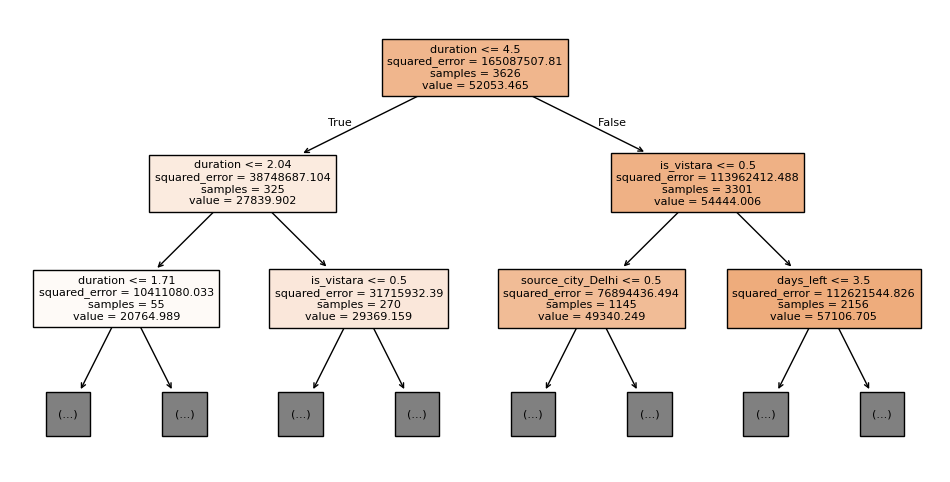

In [44]:
plt.figure(figsize=(12,6))
plot_tree(decision_tree=model_1,
          filled=True,
          feature_names=model.feature_names_in_, 
          max_depth=2,
          fontsize=8)
plt.show()

### Ważność zmiennych

Ważność zmiennych pomoże zweryfikować, które zmienne mają wpływ na cenę biletu.

In [45]:
# Ważność zmiennych
importances = pd.DataFrame(columns=['name','importance'])
importances['name'] = model.feature_names_in_
importances['importance'] = model.feature_importances_
importances = importances.sort_values(by='importance',ascending = False)


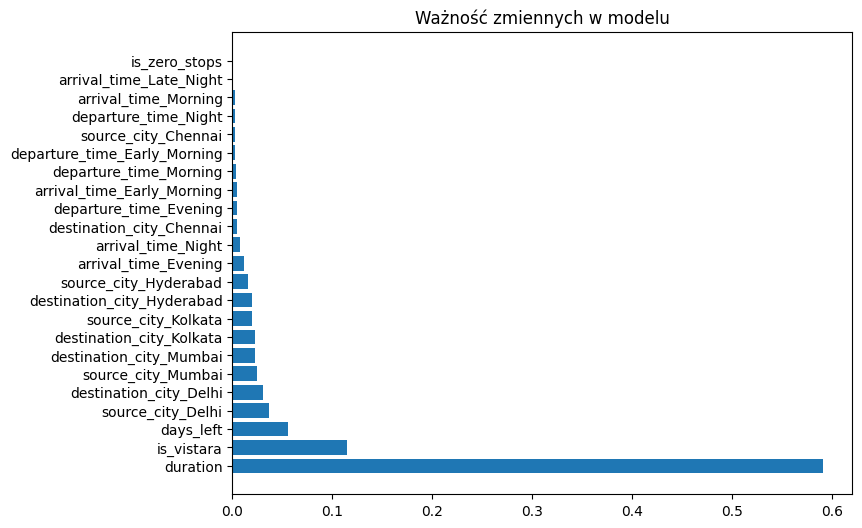

In [46]:
plt.figure(figsize=(8,6))
plt.barh(importances['name'], importances['importance'])
plt.title('Ważność zmiennych w modelu')
plt.show()

### Jakość modelu

$MAPE$ - Mean absolute percentage error - średnia różnica pomiędzy wartością rzeczywistą a modelową, wyrażona w procentach.


In [47]:
# Predykcje
train_pred = model.predict(train_x)
test_pred = model.predict(test_x)

In [48]:
# MAPE test
round(mean_absolute_percentage_error(test_y['price'], test_pred),2)

0.14

In [49]:
# MAPE train
round(mean_absolute_percentage_error(train_y['price'], train_pred),2)

0.14

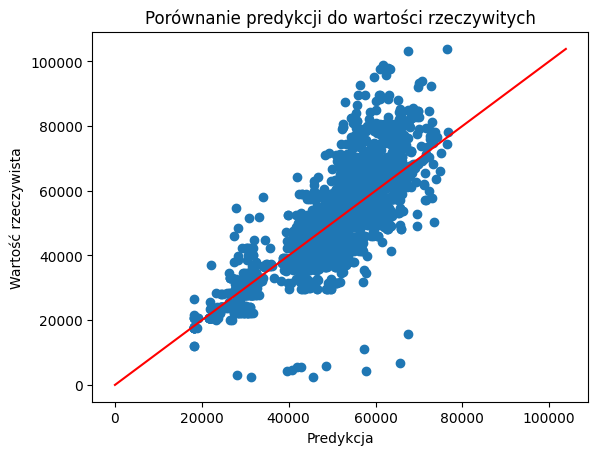

In [50]:
# Wykres rozrzutu
plt.scatter(test_pred,test_y['price'])
plt.plot(np.arange(0,test_y['price'].max()+10),np.arange(0,test_y['price'].max()+10),color='red')
plt.title('Porównanie predykcji do wartości rzeczywitych')
plt.xlabel('Predykcja')
plt.ylabel('Wartość rzeczywista')
plt.show()

## Wykorzystanie modelu

In [ ]:
prediction_prepare = pd.DataFrame(columns=model.feature_names_in_)
prediction_prepare.loc[0,:] = 0


In [54]:
# Określenie zmiennych
prediction_prepare['duration'] = 11.74
prediction_prepare['is_zero_stops'] = 1
prediction_prepare['departure_time_Early_Morning'] = 1
prediction_prepare['arrival_time_Morning'] = 1
prediction_prepare['is_vistara'] = 1
prediction_prepare['source_city_Delhi'] = 0
prediction_prepare['source_city_Hyderabad'] = 1
prediction_prepare['destination_city_Mumbai'] = 0
prediction_prepare['destination_city_Delhi'] = 1

In [55]:
# Cena biletu w zależności od liczby dni do lotu
preds = []
for i in range(1,30):
    prediction_prepare['days_left']= i
    preds.append(model.predict(prediction_prepare))
    
    

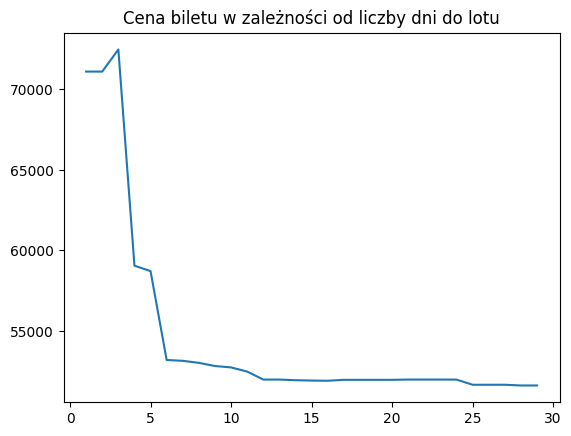

In [57]:
# Wizualizacja
plt.plot(range(1,30),preds)
#plt.ylim(0,max(preds)*1.1)
plt.title('Cena biletu w zależności od liczby dni do lotu')
plt.show()